In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")



In [ ]:
train_df.replace({"Transported":{False:0,True:1}} , inplace=True)
train_df.replace({"CryoSleep":{False:0,True:1}} , inplace=True)
train_df.replace({"VIP":{False:0,True:1}} , inplace=True)

test_df.replace({"Transported":{False:0,True:1}} , inplace=True)
test_df.replace({"CryoSleep":{False:0,True:1}} , inplace=True)
test_df.replace({"VIP":{False:0,True:1}} , inplace=True)

In [ ]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [ ]:

features=["HomePlanet","CryoSleep"]
def converted_data(features,train_df):
  for feature in features:
    train_df[feature]= train_df[feature].astype("category")

converted_data(features,train_df)
converted_data(features,test_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   float64 
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   int64   
dtypes: category(2), float64(7), int64(1), object(4)
memory usage: 832.3+ KB


## EDA- Exploratory Data Analysis

In [ ]:
train_df["Transported"].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

<Axes: xlabel='HomePlanet', ylabel='count'>

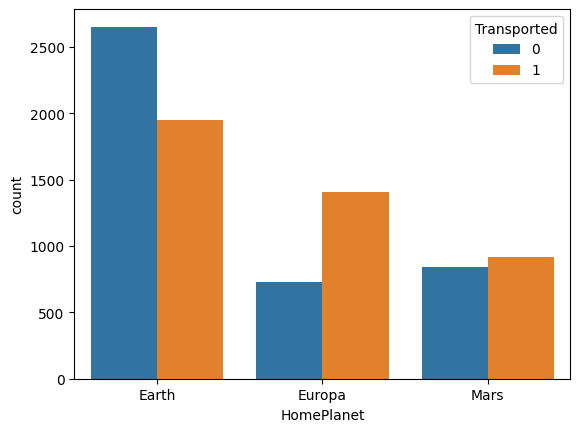

In [ ]:
sns.countplot(data=train_df,x="HomePlanet",hue="Transported")

<Axes: xlabel='Age', ylabel='Count'>

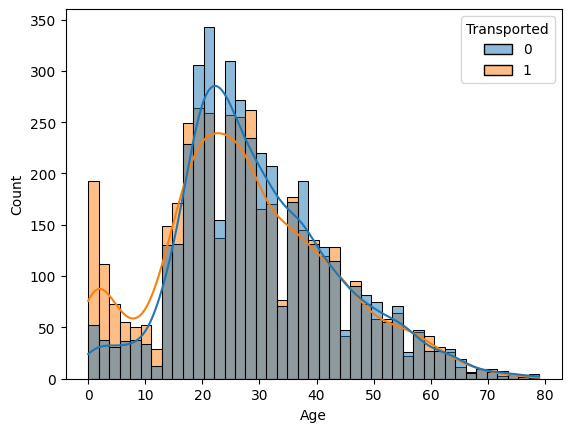

In [ ]:
sns.histplot(data=train_df,x="Age",hue="Transported",kde=True)

In [ ]:
train_df[["Cabin_Desk","Cabin_Num","Cabin_Side"]]=train_df['Cabin'].str.split('/', expand=True)
train_df.drop("Cabin",axis=1,inplace=True)

test_df[["Cabin_Desk","Cabin_Num","Cabin_Side"]]=test_df['Cabin'].str.split('/', expand=True)
test_df.drop("Cabin",axis=1,inplace=True)


<Axes: xlabel='Cabin_Side', ylabel='count'>

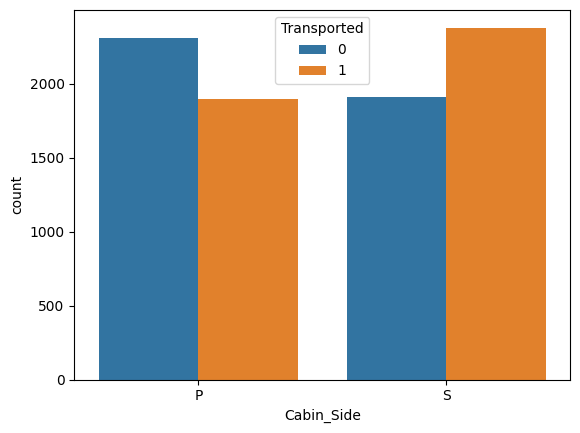

In [ ]:
sns.countplot(data=train_df,x="Cabin_Side",hue="Transported")


## Data Wrangling

In [ ]:
drop_feature=["Cabin_Desk","Cabin_Num"]
for feature in drop_feature:
  train_df.drop(feature,axis=1,inplace=True)


In [ ]:
for feature in drop_feature:
  test_df.drop(feature,axis=1,inplace=True)

In [ ]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,P
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,S
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,S
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,S
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0.0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,P
8689,9278_01,Earth,1.0,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,S
8690,9279_01,Earth,0.0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,S
8691,9280_01,Europa,0.0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,S


In [ ]:
numerical_feature=["Age","VIP","RoomService","FoodCourt","ShoppingMall"	,"Spa"	,"VRDeck"]
categorical_feature=["HomePlanet","Cabin_Side"]
features_col=numerical_feature+categorical_feature

In [ ]:
def display_missingvalue(df,feature):
  for feature in feature:
    missing_value=df[feature].isnull().sum()
    if missing_value >0:
      print(f"Col {feature} has {missing_value} missing value")
display_missingvalue(train_df,features_col)

Col Age has 179 missing value
Col VIP has 203 missing value
Col RoomService has 181 missing value
Col FoodCourt has 183 missing value
Col ShoppingMall has 208 missing value
Col Spa has 183 missing value
Col VRDeck has 188 missing value
Col HomePlanet has 201 missing value
Col Cabin_Side has 199 missing value


In [ ]:
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].median())

In [ ]:
display_missingvalue(train_df,features_col)

Col VIP has 203 missing value
Col RoomService has 181 missing value
Col FoodCourt has 183 missing value
Col ShoppingMall has 208 missing value
Col Spa has 183 missing value
Col VRDeck has 188 missing value
Col HomePlanet has 201 missing value
Col Cabin_Side has 199 missing value


In [ ]:
X=train_df[features_col]
y=train_df["Transported"]

In [ ]:
X_test=test_df[features_col]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numerical_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scale",StandardScaler())
])

categorical_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encode",OneHotEncoder(handle_unknown="ignore"))

])

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ("num",numerical_transform,numerical_feature),
    ("cat",categorical_transform,categorical_feature)

])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'VIP', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['HomePlanet', 'Cabin_Side'])])

In [ ]:
X=preprocessor.transform(X)

In [ ]:
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].median())
test_df=test_df[features_col]

In [ ]:
test_df=preprocessor.transform(X_test)

#Build Model

In [ ]:
X_train,X_val, y_train,y_val= train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(solver="liblinear")
log.fit(X,y)

LogisticRegression(solver='liblinear')

In [ ]:
log.score(X_val,y_val)

0.7878090856814262

In [ ]:
from sklearn.metrics import precision_score,recall_score, classification_report,confusion_matrix
y_pred=log.predict(X_val)
precision_score(y_val,y_pred), recall_score(y_val,y_pred)

(0.7605911330049261, 0.8596881959910914)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       841
           1       0.76      0.86      0.81       898

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



## SVM

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X,y)

SVC()

In [ ]:
svc.score(X_val,y_val)

0.8004600345025877

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed=2023
model=[

      LinearSVC(max_iter=12000,random_state=2023),
      KNeighborsClassifier(metric="minkowski",p=2),
      DecisionTreeClassifier(random_state=seed),
      RandomForestClassifier(random_state=seed),
      ExtraTreesClassifier(),
      AdaBoostClassifier(),
      XGBClassifier(use_label_encoder=False,eval_metric="logloss",random_state=seed)



]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(model,X,y,metrics,cv=5, plot_results=False):
  # stratified kfold help balance class 0,1 iff wwe divide random
  kfold=StratifiedKFold(cv,shuffle=True,random_state=seed)
  entries=[]
  for model in model:
    model_name=model.__class__.__name__
    scores=cross_val_score(model,X,y,scoring=metrics,cv=kfold)
    for fold_idx,score in enumerate(scores):
      entries.append((model_name,fold_idx,score))
  cv_df=pd.DataFrame(entries,columns=["model_name","fold_idx","accuracy_score"])

  if plot_results:
    sns.boxplot(x="model_name",y="accuracy_score",data=cv_df,color="lightblue",showmeans=True)
    plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross validation")
    plt.xticks(rotation=45)
    plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


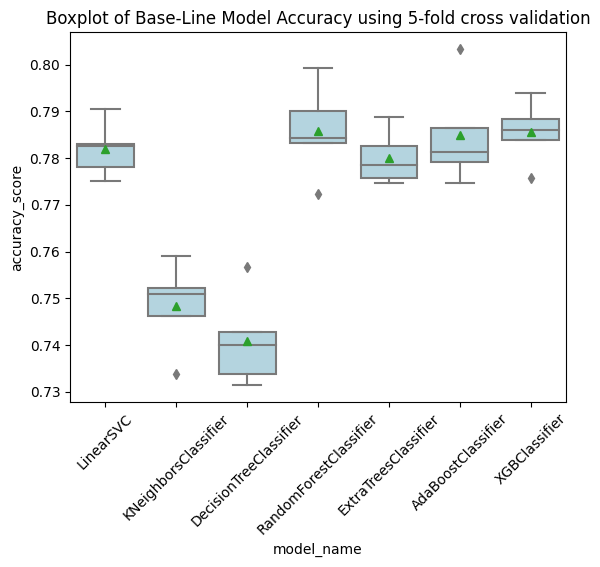

In [ ]:
from sklearn.model_selection import cross_val_score
generate_baseline_results(model,X,y,metrics="accuracy",cv=5, plot_results=True)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True, verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
best_rf_model = grid_search.best_estimator_


In [ ]:
import joblib
joblib.dump(best_rf_model, "best_rf_model.joblib")

['best_rf_model.joblib']

In [ ]:
loaded_rf_model = joblib.load("best_rf_model.joblib")

In [ ]:
prediction=loaded_rf_model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, prediction)

In [ ]:
test_data2=pd.read_csv("test.csv")

In [ ]:
predict_test_set=loaded_rf_model.predict(test_df)

In [ ]:
final_data=pd.DataFrame(test_data2["PassengerId"])
final_data["Transported"]=predict_test_set

In [ ]:
final_data

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [ ]:
final_data.to_csv("/content/data",index=False)